# 02 OS Open Greenspace Area Distribution
---

Analysing the distribution of OS Open Greenspace areas.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Matplotlib created a temporary cache directory at /tmp/matplotlib-4yw6che4 because the default path (/home/rstudio-user/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


###  Create GeoDataFrame from GeoPackage (GPKG)

In [2]:
# Create a GeoPandas GeoDataFrame from a GeoPackage (GPKG)
osogs = gpd.read_file(
    filename="../../data/ordnance-survey/os-open-greenspace-gb.gpkg",
    # GPKG layer
    layer="greenspace_site",
)

ERROR 1: PROJ: proj_create_from_database: Open of /cloud/lib/envs/training/share/proj failed


###  Add `area` column to GeoDataFrame

In [3]:
# Calculate area of feature geometry
osogs["area"] = osogs["geometry"].area

In [4]:
# Return GeoDataFrame columns
osogs.columns

Index(['id', 'function', 'distinctive_name_1', 'distinctive_name_2',
       'distinctive_name_3', 'distinctive_name_4', 'geometry', 'area'],
      dtype='object')

In [5]:
osogs.shape[0]

150415

### Filter GeoDataFrame

Subset GeoDataFrame retaining rows where the column `function` is equal to `'Playing Field'`.

In [6]:
osogs_filtered = osogs.loc[(osogs["function"] == "Playing Field")]

In [7]:
osogs_filtered.shape[0]

21377

### Plot histogram showing the distribution of areas

Visualise the distribution of `area` values for the filtered subset of OS Open Greenspace features using a histogram.

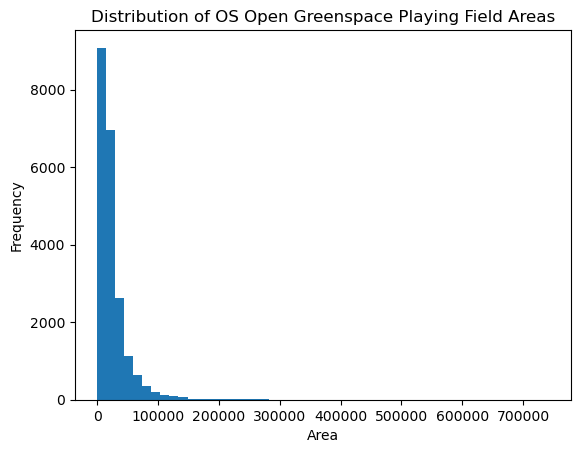

In [8]:
# Create figure and axes objects
f, ax = plt.subplots()

# Set x label
ax.set_xlabel("Area")
# Set y label
ax.set_ylabel("Frequency")
# Set title
ax.set_title("Distribution of OS Open Greenspace Playing Field Areas")

# Plot histogram showing distribution of areas
_ = ax.hist(x=osogs_filtered["area"], bins=50)

The areas are skewed heavily to the lower end; let's look at that area in more detail using the `range` kwarg.

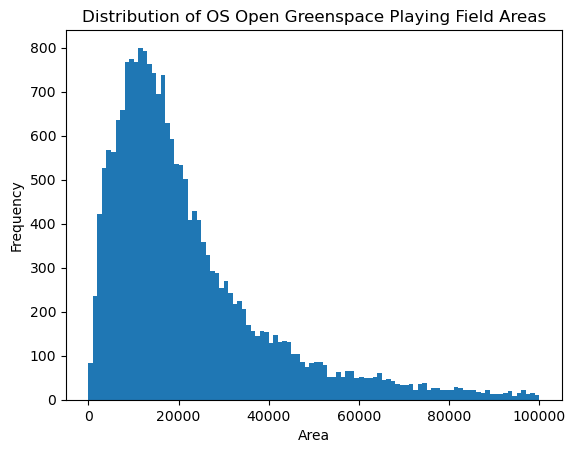

In [9]:
# Create figure and axes objects
f, ax = plt.subplots()

# Set x label
ax.set_xlabel("Area")
# Set y label
ax.set_ylabel("Frequency")
# Set title
ax.set_title("Distribution of OS Open Greenspace Playing Field Areas")

# Plot histogram showing distribution of areas
_ = ax.hist(x=osogs_filtered["area"], bins=100, range=(0, 10**5))

It's still heavily skewed.  Areas are often [log-normally distributed](https://en.wikipedia.org/wiki/Log-normal_distribution), so let's plot the logarithm of the area.

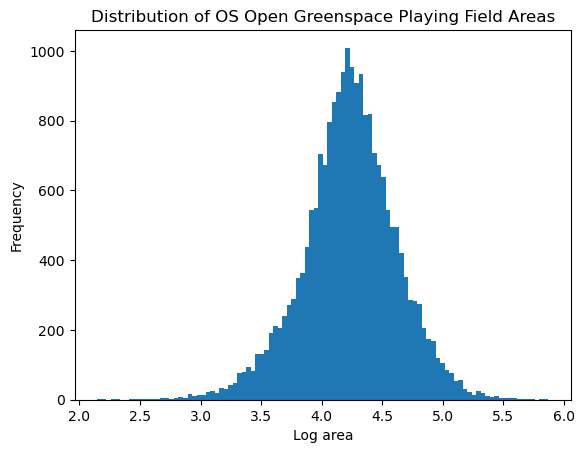

In [10]:
# Create figure and axes objects
f, ax = plt.subplots()

# Set x label
ax.set_xlabel("Log area")
# Set y label
ax.set_ylabel("Frequency")
# Set title
ax.set_title("Distribution of OS Open Greenspace Playing Field Areas")

# Plot histogram showing distribution of areas
_ = ax.hist(x=np.log10(osogs_filtered["area"]), bins=100)

*The distribution seems normal in log-space, with a peak around 10<sup>4</sup> = 1000 m<sup>2</sup>.*

### Plot boxplot showing the distribution of areas

Visualise the distribution of `area` values for the filtered subset of OS Open Greenspace features using a boxplot.

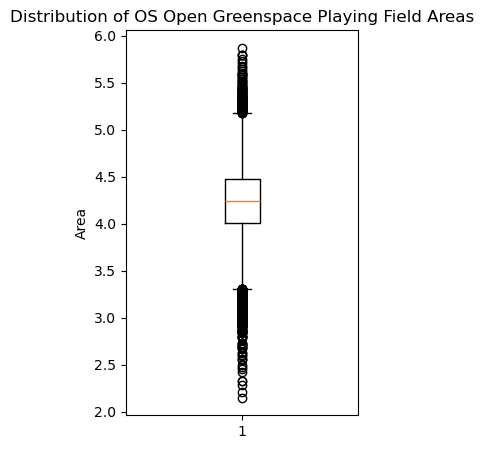

In [11]:
# Create figure and axes objects
f, ax = plt.subplots(figsize=(3, 5))

# Set y label
ax.set_ylabel("Area")
# Set title
ax.set_title("Distribution of OS Open Greenspace Playing Field Areas")

# Plot boxplot showing distribution of areas
_ = ax.boxplot(x=np.log10(osogs_filtered["area"]))

### Sum areas by function

Calculated the sum of the `area` values of OS Open Greenspace features by function.

In [12]:
# Sum area values by function
osogs_grouped = osogs.groupby("function")["area"].sum().reset_index()

# Return head of DataFrame
osogs_grouped.head()

,function,area
0,Allotments Or Community Growing Spaces,1.266254e+08
1,Bowling Green,1.849402e+07
2,Cemetery,1.248003e+08
3,Golf Course,1.238751e+09
4,Other Sports Facility,2.859421e+08


### Plot barchart showing total area by function

Visualise the total area of OS Open Greenspace features by function using a bar plot.

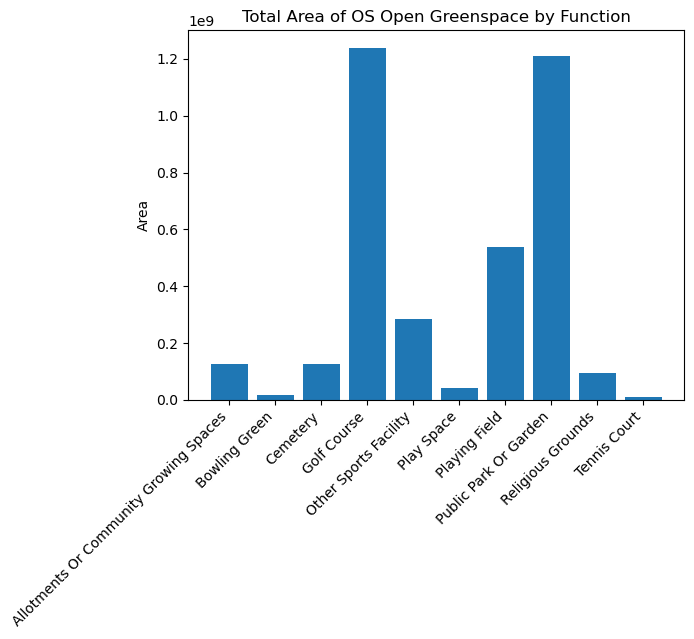

In [13]:
# Create figure and axes objects
f, ax = plt.subplots()

# Set y label
ax.set_ylabel("Area")
# Set title
ax.set_title("Total Area of OS Open Greenspace by Function")

# Plot bar chart showing sum of areas by function
ax.bar(x=osogs_grouped["function"], height=osogs_grouped["area"])

# Rotate x labels
_ = ax.set_xticks(
    ax.get_xticks(), labels=ax.get_xticklabels(), rotation=45, ha="right", va="top"
)

### Plot histogram subplots showing the distribution of areas by function

Visualise the distribution of `area` values for OS Open Greenspace features by function using a histogram subplots.

In [14]:
# Count number of unique function values
osogs["function"].nunique()

10

In [15]:
# Return unique function values in a list
functions = list(osogs["function"].unique())

functions

['Play Space',
 'Religious Grounds',
 'Golf Course',
 'Playing Field',
 'Public Park Or Garden',
 'Other Sports Facility',
 'Tennis Court',
 'Cemetery',
 'Allotments Or Community Growing Spaces',
 'Bowling Green']

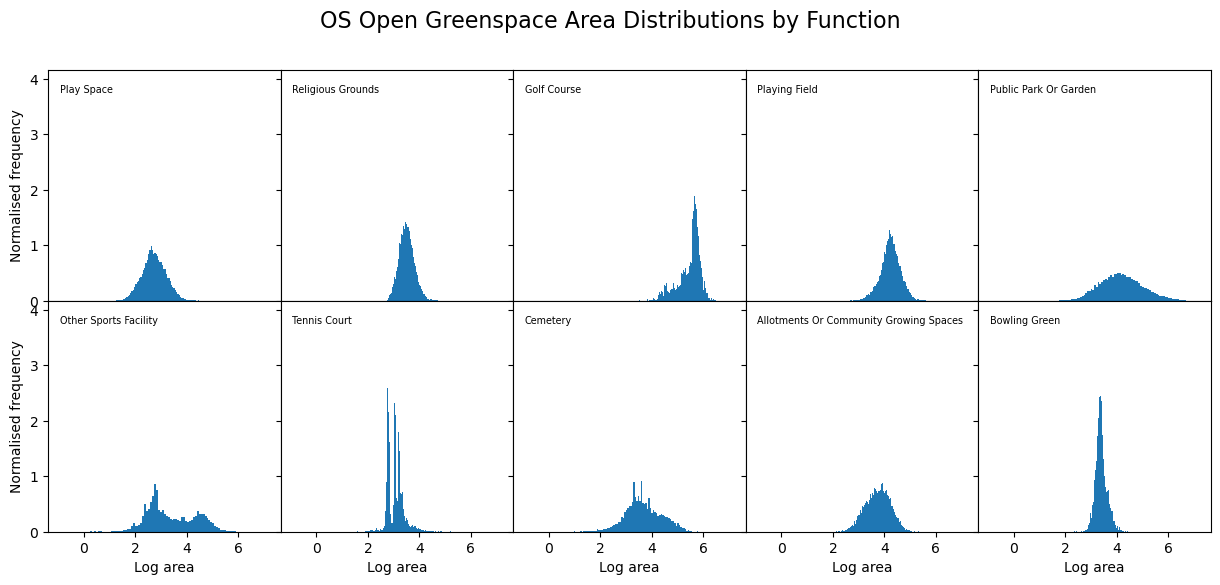

In [16]:
# Create figures and axes objects
f, axs = plt.subplots(
    nrows=2,
    ncols=5,
    figsize=(15, 6),
    # Share x and y axes scales between plots
    sharex=True,
    sharey=True,
    # Set no whitespace between plots
    gridspec_kw={"wspace": 0, "hspace": 0},
)

# Set title
f.suptitle("OS Open Greenspace Area Distributions by Function", fontsize=16)

# Set x labels along the bottom
_ = [ax.set_xlabel("Log area") for ax in axs[-1, :]]
# Set y labels along the left
_ = [ax.set_ylabel("Normalised frequency") for ax in axs[:, 0]]

# Iterate over functions and axes
for function, ax in zip(functions, axs.flatten()):
    # Filter GeeoDataFrame by function
    osogs_filtered = osogs[osogs["function"] == function]

    # Set an annotation label in the upper left corner
    ax.annotate(function, (0.05, 0.9), xycoords="axes fraction", fontsize="x-small")

    # Plot histogram showing distribution of log of areas
    # Set density=True to scale the y-axes according to the number of items in each class
    # to make the area under each histogram constant
    ax.hist(x=np.log10(osogs_filtered["area"]), bins=100, density=True)

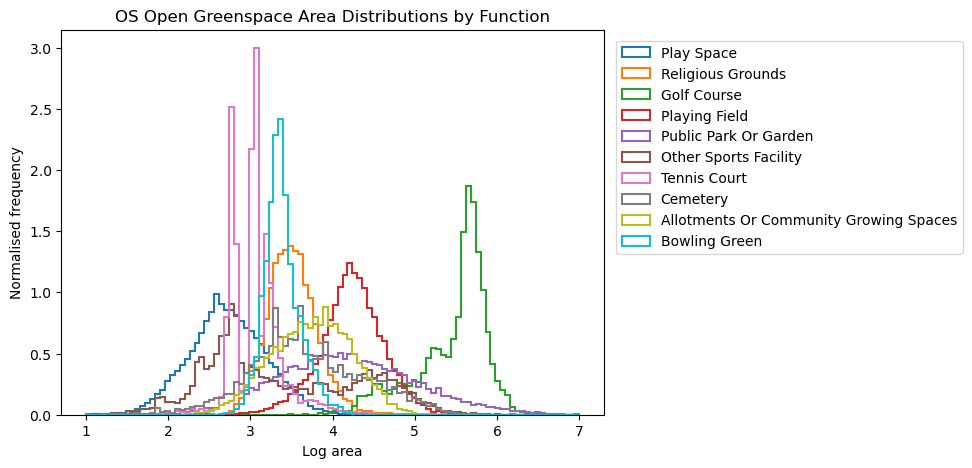

In [17]:
# Create figures and axes objects
f, ax = plt.subplots(figsize=(7, 5))

# Set title
ax.set_title("OS Open Greenspace Area Distributions by Function")

# Set x label
ax.set_xlabel("Log area")
# Set y label
ax.set_ylabel("Normalised frequency")

# Iterate over functions and axes
for function in functions:
    # Filter GeeoDataFrame by function
    osogs_filtered = osogs[osogs["function"] == function]

    # Plot histogram showing distribution of log of areas
    # Set density=True to scale the y-axes according to the number of items in each class
    # to make the area under each histogram constant
    ax.hist(
        x=np.log10(osogs_filtered["area"]),
        bins=100,
        range=(1, 7),
        density=True,
        histtype="step",
        linewidth=1.5,
        label=function,
    )

# Create a legend outside the plot; bbox_to_anchor shifts the legend
_ = ax.legend(loc="upper left", bbox_to_anchor=(1.01, 0.99))

### Also create a box plot broken down by each class

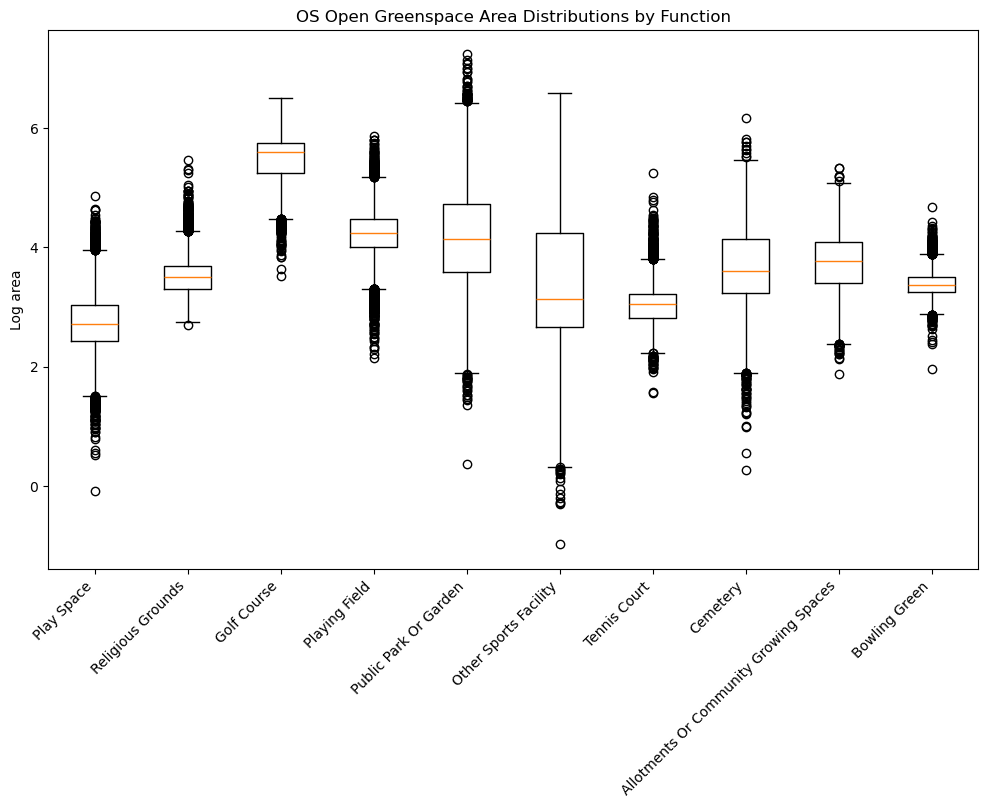

In [18]:
# Create figures and axes objects
f, ax = plt.subplots(figsize=(12, 7))

# Set title
ax.set_title("OS Open Greenspace Area Distributions by Function")

# Set y label
ax.set_ylabel("Log area")

# Find the array of log-areas for each label
vectors = [
    np.log10(osogs[osogs["function"] == function]["area"]) for function in functions
]

# Create boxplots for each function
_ = ax.boxplot(x=vectors, labels=functions)

# Rotate x labels
_ = ax.set_xticks(
    ax.get_xticks(), labels=ax.get_xticklabels(), rotation=45, ha="right", va="top"
)